In [1]:
!pip install gensim


In [6]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [7]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [8]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

basketball = model['basketball']
print(model.most_similar('basketball'))

#I think the result makes sense. The words are all related to basketball in some way.

[('football', 0.855563759803772), ('hockey', 0.8041675090789795), ('soccer', 0.8003970980644226), ('nba', 0.7771992683410645), ('baseball', 0.7645360827445984), ('volleyball', 0.7434347867965698), ('softball', 0.7363321185112), ('sports', 0.7128217816352844), ('team', 0.7124603986740112), ('ncaa', 0.7113979458808899)]


In [9]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [10]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [11]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

food_in_china_vector = model["dumplings"] - model["china"]
food_in_italy = model["italy"] + food_in_china_vector
print(model.most_similar(food_in_italy))

food_in_america = model["america"] + food_in_china_vector
print(model.most_similar(food_in_america))

#I found that these are all foods that are popular in Italy and USA. This shows that the model has learned that these foods are popular in these countries.

[('meatballs', 0.5875340700149536), ('ravioli', 0.5719979405403137), ('gnocchi', 0.5678608417510986), ('sausages', 0.5676326155662537), ('costantino', 0.5552986264228821), ('lasagna', 0.5527873635292053), ('pasta', 0.5406556129455566), ('mozzarella', 0.5394600629806519), ('spaghetti', 0.5354750752449036), ('prosciutto', 0.5334103107452393)]
[('doughnuts', 0.5395753383636475), ('spaghetti', 0.5321949124336243), ('ravioli', 0.5299811959266663), ('sandwiches', 0.5210487842559814), ('potato', 0.5182456374168396), ('jelly', 0.51515793800354), ('bagels', 0.5151510834693909), ('pudding', 0.5113402009010315), ('cheese', 0.5100163221359253), ('tamales', 0.5057138800621033)]


Part 2: Visualization and Embeddings in Space

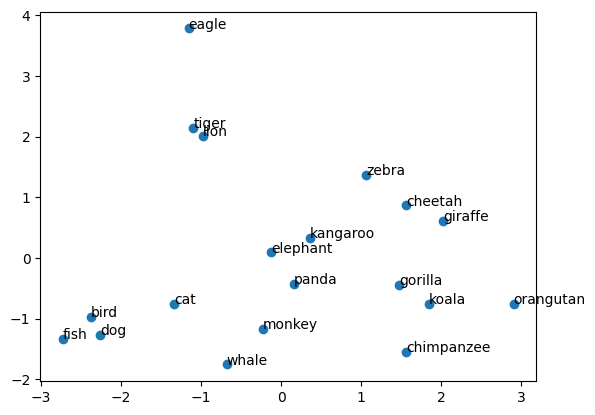

In [12]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

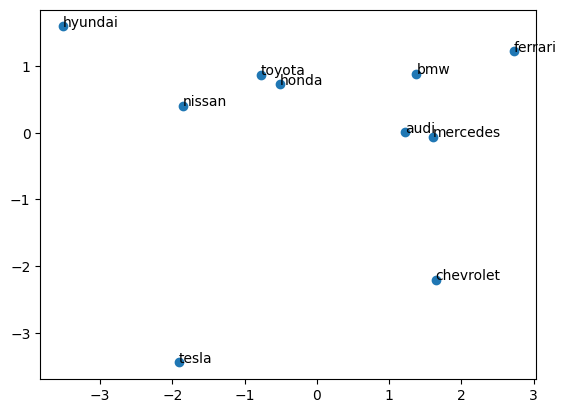

In [13]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
words=["toyota", "honda", "bmw", "audi", "mercedes", "ferrari", "chevrolet", "hyundai", "tesla", "nissan", ]

X=[model[word] for word in words]

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


#We can see that the words are clustered together in a way that makes sense. For example, the luxury car brands are clustered together, and the more affordable car brands are clustered together.

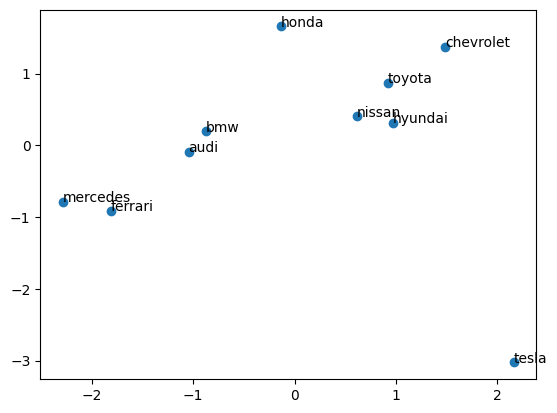

In [14]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

words=["toyota", "honda", "bmw", "audi", "mercedes", "ferrari", "chevrolet", "hyundai", "tesla", "nissan", ]

X=[twitter_model[word] for word in words]

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

#I found that the words are not clustered together in a way that makes sense. This is likely because the twitter model was trained on twitter data, which is very different from wikipedia data. Twitter data is more informal and may contain more slang and abbreviations, which could affect the embeddings.

Part 3: Embedding reddit posts

In [16]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [17]:
#using the code from project 1, clean the text and create a bag of words representation of the text
from sklearn.feature_extraction.text import CountVectorizer

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
data.head()


,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1,have the same professor and in lecture he did ...
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1,do you find it helpful to still go to the lect...
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1,have you tried emailing university housing to ...
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1,purchasing illini cash should get you added to...
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1,just did thanks for the suggestion it hadnt oc...


In [18]:
data['cleaned_text']

0       have the same professor and in lecture he did ...
1       do you find it helpful to still go to the lect...
2       have you tried emailing university housing to ...
3       purchasing illini cash should get you added to...
4       just did thanks for the suggestion it hadnt oc...
                              ...                        
1033    if you decide to and want some help feel free ...
4016    the other comments are correct but i would con...
514     well there was an international football playe...
6057    i wish this would be built around the time i f...
6032                          excuse me this is fake news
Name: cleaned_text, Length: 9450, dtype: object

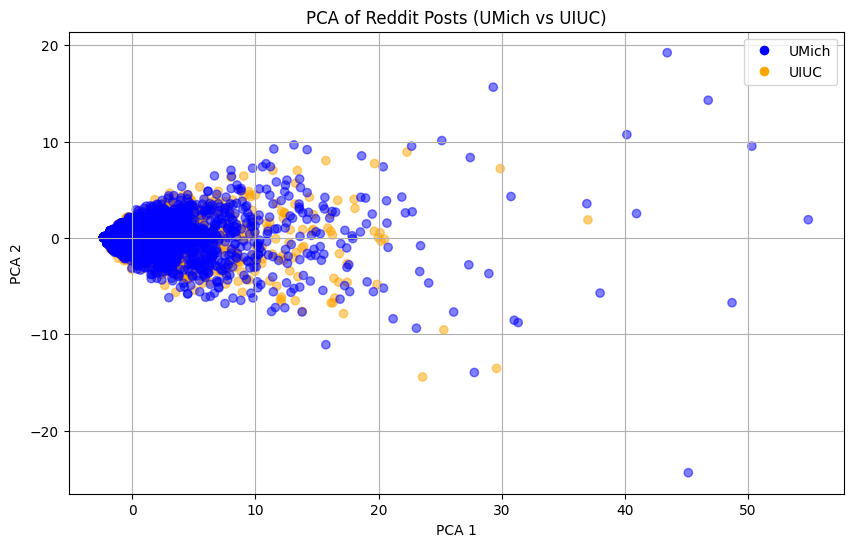

In [19]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

X=bag_of_words

pca=PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
colors = ['blue' if label == 0 else 'orange' for label in data['label']]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5, label='Posts')

# Add legend
plt.title("PCA of Reddit Posts (UMich vs UIUC)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='UMich', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='UIUC', markerfacecolor='orange', markersize=8)
])
plt.grid(True)
plt.show()

#There is no clear linear separation between UIUC and UMich posts in this 2D PCA space based on the Bag-of-Words representation.

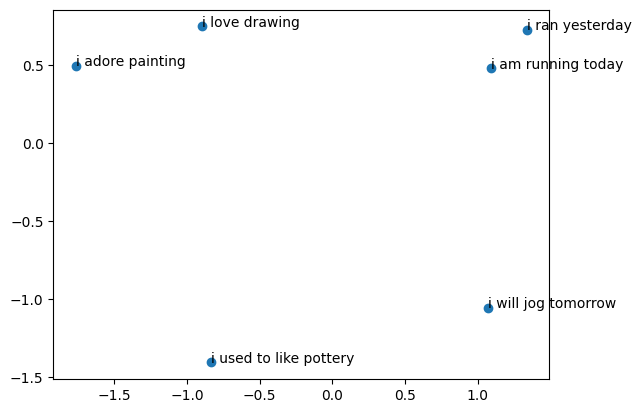

In [20]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

c:\Users\12753\anaconda3\envs\is310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\12753\anaconda3\envs\is310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


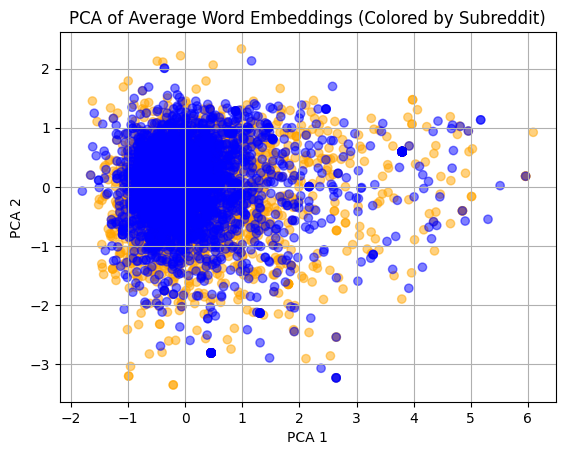

In [21]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 
avg_embeddings = []
valid_labels = []

for i, text in enumerate(data['cleaned_text']):
    emb = avg_embedding(text, model)
    if not np.isnan(emb).any():
        avg_embeddings.append(emb)
        valid_labels.append(data['label'].iloc[i])

# Reduce to 2D using PCA
X_pca = PCA(n_components=2).fit_transform(avg_embeddings)

# Plot and color by subreddit label
colors = ['blue' if label == 0 else 'orange' for label in valid_labels]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)

plt.title("PCA of Average Word Embeddings (Colored by Subreddit)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

#Previous plot (BoW) used sparse word counts — it treated each word as independent, without capturing meaning or context. This plot (Avg Embeddings) uses GloVe word vectors — so semantically similar words (e.g., “university” and “college”) are close in space, even if they’re not the same word.

#There is some separation, especially along the horizontal axis (PCA 1), but it’s not perfect. The two subreddits (UMich in blue, UIUC in orange) overlap a lot, suggesting shared language, topics, or style.

Part 4: HuggingFace and BERT

In [39]:
!pip install transformers
!pip install tensorflow

   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 3.7/375.7 MB 19.8 MB/s eta 0:00:19
    --------------------------------------- 6.3/375.7 MB 16.1 MB/s eta 0:00:23
   - -------------------------------------- 10.0/375.7 MB 16.8 MB/s eta 0:00:22
   - -------------------------------------- 14.4/375.7 MB 17.8 MB/s eta 0:00:21
   - -------------------------------------- 18.4/375.7 MB 17.8 MB/s eta 0:00:21
   -- ------------------------------------- 22.8/375.7 MB 18.3 MB/s eta 0:00:20
   -- ------------------------------------- 26.7/375.7 MB 18.4 MB/s eta 0:00:19
   --- ------------------------------------ 30.4/375.7 MB 18.2 MB/s eta 0:00:19
   --- ------------------------------------ 34.6/375.7 MB 18.3 MB/s eta 0:00:19
   ---- ----------------------------------- 39.3/375.7 MB 18.7 MB/s eta 0:00:19
   ---- ----------------------------------- 44.0/375.7 MB 19.2 MB/s eta 0:00:18
   ----- ---------------------------------- 48.5/37

In [1]:
!pip install torch
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 15.7 MB/s eta 0:00:00


In [2]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

c:\Users\12753\anaconda3\envs\is310\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\12753\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

In [3]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [48]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
sample = data.head(3000)

sample['sentiment'] = sample['cleaned_text'].apply(lambda x: pipe(x[:128])[0]['label'])

most_common_sentiment = sample['sentiment'].value_counts().idxmax()
print(most_common_sentiment)

#We can see the most common sentiment label is neutral.

NEU


C:\Users\12753\AppData\Local\Temp\ipykernel_27064\2117061505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['sentiment'] = sample['cleaned_text'].apply(lambda x: pipe(x[:128])[0]['label'])


In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 
sample[['cleaned_text', 'sentiment', 'label']].sample(10)

#I agree with most of the sentiment labels. But I think the last one should be neutral as well.

,cleaned_text,sentiment,label
1427,what kind of games you play i might be down to...,NEU,1
1351,im old and havent been in the area for quite s...,NEU,1
102,youre just trying to keep all the opportunitie...,NEU,1
1656,same question,NEU,1
1772,theres an entire campus and community availabl...,NEU,1
2293,this is pending,NEU,1
291,for this academic year the minimum stipend for...,NEU,1
1383,yeah but im wondering if that wasnt a mistake,NEU,1
439,hey i did the same and fr the mu and dt librar...,NEU,1
2189,as it was fall and i gained my covid it was...,NEG,1


In [ ]:
#is the UIUC or Michigan subreddit more negative?
neg_counts = sample[sample['sentiment'] == 'NEG'].groupby('label').size()

# Total posts per subreddit
total_counts = sample.groupby('label').size()

# Calculate negative post proportion
neg_ratio = neg_counts / total_counts

print("Negative post ratio:")
print(neg_ratio)

# Compare and print conclusion
neg_ratio_dict = neg_ratio.to_dict()

# Compare and print
if neg_ratio_dict.get(1, 0) > neg_ratio_dict.get(0, 0):
    print("\n🔸 UIUC subreddit is more negative.")
else:
    print("\n🔹 Michigan subreddit is more negative.")

#We can see that the UIUC subreddit is more negative.

Negative post ratio:
label
1    0.211333
dtype: float64

🔸 UIUC subreddit is more negative.
